In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error  # For regression tasks
from sklearn.metrics import accuracy_score  # For classification tasks
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Train and Split/ preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML-BTP/42_feature_min_dischrge range.csv')
data.head(2)

,cycle,f28,f29,f35,f36,f37,f38,f39,f40,f41,...,f25,f26,f27,f30,f32,f34,f31,f33,f2,f1
0,1852.0,1.075913,0.463142,0.311261,0.292295,0.227219,29.051816,31.287710,35.022981,0.000075,...,337.686478,1.000000,-336.608433,-0.352749,-0.227219,20.470354,0.179048,-0.296832,0.249927,0.251548
1,2160.0,1.080630,0.003960,0.425982,0.478987,0.156444,29.265889,31.017011,33.819048,0.000042,...,0.630346,0.999975,0.451976,-0.336861,-0.156444,30.447377,0.085478,-0.347750,0.166832,0.166303


In [4]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/23_feature.csv')
# data.head(2)

In [5]:
pip install lazypredict

In [6]:
X = data.drop('cycle', axis=1)  # Replace 'target_column' with the actual target column name
d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=X.columns)
# print(scaled_df)
y = data['cycle']
y.head(2)
X=scaled_df

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# **MoDel Trainng**

1. All Regresser Result



In [8]:
from lazypredict.Supervised import LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=12)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:03<00:00, 11.34it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1457
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 42
[LightGBM] [Info] Start training from score 787.585859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [9]:
models=models.sort_values(by='RMSE')
models.head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,1.41,0.70,186.62,0.04
GradientBoostingRegressor,1.41,0.69,186.98,0.24
RandomForestRegressor,1.46,0.66,197.54,0.31
Lasso,1.47,0.65,200.59,0.02
LassoLars,1.47,0.65,200.60,0.02
BaggingRegressor,1.48,0.64,203.10,0.06
Ridge,1.52,0.61,210.82,0.01
HuberRegressor,1.54,0.59,215.22,0.04
LGBMRegressor,1.58,0.56,223.76,0.15


In [10]:
# predictions

# Result

In [11]:
name='PoissonRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
print( ' for Model :', name)
df1=df1.sort_values(by='Deviation')
df1.head(10)
# df1

 for Model : PoissonRegressor


,Orignal,PoissonRegressor,Deviation,Battery No.
4,480.00,483.69,3.69,46
22,1063.00,1097.95,34.95,85
3,1155.00,1193.65,38.65,102
0,704.00,754.60,50.60,31
18,870.00,925.74,55.74,7
17,559.00,615.37,56.37,17
15,691.00,763.65,72.65,14
12,1017.00,943.46,73.54,19
10,788.00,693.18,94.82,15
13,935.00,1037.17,102.17,112


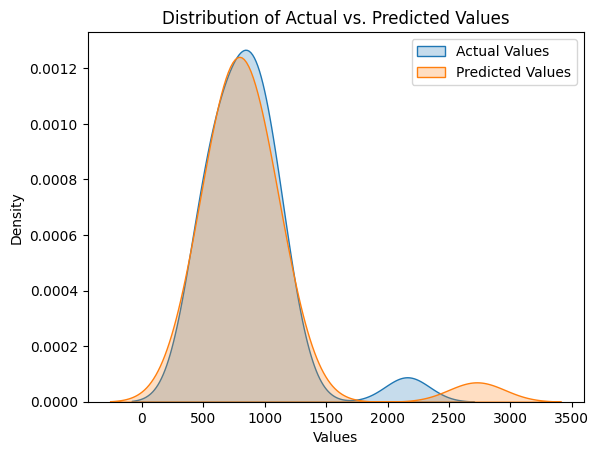

In [12]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()

# Manual Training

In [13]:
result = []
from sklearn.model_selection import cross_val_score


### 1. GaussianProcessRegressor

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Define the kernel (you can change the kernel function as needed)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create and train the Gaussian Process regressor
gp = GaussianProcessRegressor(kernel=None, n_restarts_optimizer=10)
gp.fit(X_train, y_train)

# Make predictions on the testing data
y_pred, sigma = gp.predict(X_test, return_std=True)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

result.append({ "Regressor": "GaussianProcessRegressor", "R^2":round(r2,2), "RMSE" : round(rmse,4)})
# df=pd.DataFrame(y_pred)
# df

Root Mean Squared Error (RMSE): 1628.2753
R-squared (R^2): -22.1929


### 2. Elastic Net

In [15]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
elastic_net = ElasticNet(alpha=10, l1_ratio=0.2)     # You can adjust the alpha and l1_ratio as needed
elastic_net.fit(X_train, y_train)
y_pred=y_pred = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {rmse}")
result.append({ "Regressor": "GaussianProcessRegressor", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Mean Squared Error: 344.7212481820015


### 3. SVM regresser

In [16]:
from sklearn.svm import SVR
svr = SVR(kernel='poly',degree=3,C=0.6,gamma=10)  # You can change the kernel and other hyperparameters
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "SVR", "R^2":round(r2,2), "RMSE" : round(rmse,4)})
# df=pd.DataFrame(y_pred)
# df

Root Mean Squared Error (RMSE): 332.9527
R-squared (R^2): 0.0302


### 4. Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# You can adjust hyperparameters like n_estimators, max_depth, and others

rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "RandomForestRegressor", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Root Mean Squared Error (RMSE): 214.0913
R-squared (R^2): 0.5990


### 5. GradientBoostingRegressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# You can adjust hyperparameters like n_estimators, learning_rate, and max_depth

gbr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "GradientBoostingRegressor", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Root Mean Squared Error (RMSE): 231.8495
R-squared (R^2): 0.5298


### 6. Neural Network

In [19]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "Neural Network", "R^2":round(r2,2), "RMSE" : round(rmse,4)})
# df=pd.DataFrame(y_pred)
# df


1/1 [==============================] - 0s 107ms/step
Root Mean Squared Error (RMSE): 413.4569
R-squared (R^2): -0.4954


## 7. PoissonRegressor

In [20]:
from sklearn.linear_model import PoissonRegressor
# Create and train the Poisson Regression model
poisson_reg = PoissonRegressor(alpha=250, solver='lbfgs' , max_iter=5)
# You can adjust the alpha and max_iter parameters

poisson_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = poisson_reg.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "PoissonRegressor", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Root Mean Squared Error (RMSE): 340.4149
R-squared (R^2): -0.0137


## 8. Lasso

In [21]:
from sklearn.linear_model import Lasso
# Create and train the Lasso Regression model
lasso = Lasso(alpha=1.0 )
# You can adjust the alpha parameter

lasso.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "Lasso", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Root Mean Squared Error (RMSE): 361.7550
R-squared (R^2): -0.1448


## 8. LassoLars


In [22]:
from sklearn.linear_model import LassoLars
# Create and train the LassoLars Regression model
lasso_lars = LassoLars(alpha=1.0)
# You can adjust the alpha parameter
lasso_lars.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = lasso_lars.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "LassoLars", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Root Mean Squared Error (RMSE): 361.7524
R-squared (R^2): -0.1448


## 9. BaggingRegressor

In [23]:
from sklearn.ensemble import BaggingRegressor
# Create and train the Bagging Regressor model
bagging_reg = BaggingRegressor(base_estimator=None, n_estimators=750, random_state=30)
# You can specify a base estimator (e.g., a decision tree) or use the default

bagging_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = bagging_reg.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "BaggingRegressor", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Root Mean Squared Error (RMSE): 197.7875
R-squared (R^2): 0.6578


## 10. Ridge

In [24]:
from sklearn.linear_model import Ridge
# Create and train the Ridge Regression model
ridge = Ridge(alpha=250.0,solver='cholesky')        #,positive=True)
# You can adjust the alpha parameter

ridge.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "Ridge", "R^2":round(r2,2), "RMSE" : round(rmse,4)})


Root Mean Squared Error (RMSE): 343.7254
R-squared (R^2): -0.0335


## 11. HuberRegressor

In [25]:
from sklearn.linear_model import HuberRegressor
# Create and train the Huber Regressor model
huber_reg = HuberRegressor(epsilon=1.35)
# You can adjust the epsilon parameter

huber_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = huber_reg.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
result.append({ "Regressor": "HuberRegressor", "R^2":round(r2,2), "RMSE" : round(rmse,4)})

Root Mean Squared Error (RMSE): 371.4364
R-squared (R^2): -0.2069


# MY Result

In [26]:
resultDf=pd.DataFrame(result)
resultDf=resultDf.sort_values(by='RMSE')
resultDf

,Regressor,R^2,RMSE
9,BaggingRegressor,0.66,197.79
3,RandomForestRegressor,0.60,214.09
4,GradientBoostingRegressor,0.53,231.85
2,SVR,0.03,332.95
6,PoissonRegressor,-0.01,340.41
10,Ridge,-0.03,343.73
1,GaussianProcessRegressor,-0.04,344.72
8,LassoLars,-0.14,361.75
7,Lasso,-0.14,361.75
11,HuberRegressor,-0.21,371.44


# Filter Mathod

In [27]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold


# Correlation-Based Selection
# correlation_threshold = 0.3  # Adjust this threshold as needed
correlation_threshold = 0.25  # Adjust this threshold as needed
correlation_matrix = X.corr()
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features
X_filtered_corr = X.drop(highly_correlated_features, axis=1)

# Variance Threshold
variance_threshold = 0.005  # Adjust this threshold as needed
selector = VarianceThreshold(threshold=variance_threshold)
X_filtered_var = selector.fit_transform(X)

print("Correlation-Based Selection Features:")
print(X_filtered_corr.columns)

print("\nVariance Threshold Features:")
print(X.columns[selector.get_support()])


Correlation-Based Selection Features:
Index(['f28', 'f29', 'f35', 'f3', 'f5', 'f7', 'f25'], dtype='object')

Variance Threshold Features:
Index(['f38', 'f39', 'f40', 'f4', 'f25', 'f27', 'f34'], dtype='object')


In [28]:
data_feature=pd.DataFrame()
for i in X.columns[selector.get_support()]:
  data_feature[i]=X[i]
for i in X_filtered_corr.columns:
  data_feature[i]=X[i]
data_feature

,f38,f39,f40,f4,f25,f27,f34,f28,f29,f35,f3,f5,f7
0,0.06,0.06,0.07,0.08,0.70,-0.70,0.04,0.00,0.00,0.00,-0.00,0.00,0.00
1,0.40,0.42,0.46,0.52,0.01,0.01,0.42,0.01,0.00,0.01,-0.00,-0.00,0.01
2,0.25,0.26,0.29,0.33,-0.54,0.55,0.27,0.01,0.00,0.00,-0.00,-0.00,0.02
3,0.28,0.29,0.30,0.32,0.74,0.01,0.31,0.01,0.00,0.00,-0.00,0.00,-0.00
4,0.41,0.44,0.48,0.46,-0.20,0.22,0.32,0.02,0.00,0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.05,0.05,0.05,0.04,-0.70,0.70,0.07,0.00,0.00,-0.00,-0.00,-0.00,-0.00
120,0.31,0.34,0.38,0.28,0.44,-0.43,0.43,0.01,0.00,-0.00,-0.01,-0.00,-0.01
121,0.42,0.45,0.49,0.35,0.01,0.00,0.50,0.01,0.00,-0.00,-0.01,-0.00,-0.02
122,0.16,0.18,0.19,0.15,0.65,-0.65,0.18,0.01,0.00,0.00,-0.00,-0.00,-0.00


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_feature,y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:04<00:00, 10.25it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 13
[LightGBM] [Info] Start training from score 787.585859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [30]:
models.head(7)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.30,0.68,191.43,0.31
BaggingRegressor,0.13,0.60,213.95,0.06
AdaBoostRegressor,0.12,0.60,215.13,0.12
XGBRegressor,-0.11,0.49,240.82,0.25
HistGradientBoostingRegressor,-0.38,0.37,268.67,0.58
GradientBoostingRegressor,-0.42,0.35,273.06,0.14
LGBMRegressor,-0.53,0.30,283.24,0.08


In [31]:
name='RandomForestRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
print( ' for Model :', name)
# df1.head(10)
df1=df1.sort_values(by='Deviation')
df1

 for Model : RandomForestRegressor


,Orignal,RandomForestRegressor,Deviation,Battery No.
21,483.00,474.02,8.98,51
23,599.00,613.61,14.61,40
3,1155.00,1132.90,22.10,102
6,616.00,585.58,30.42,39
22,1063.00,1021.03,41.97,85
14,520.00,564.11,44.11,69
15,691.00,748.96,57.96,14
17,559.00,497.23,61.77,17
19,461.00,526.00,65.00,61
11,1054.00,1173.24,119.24,8


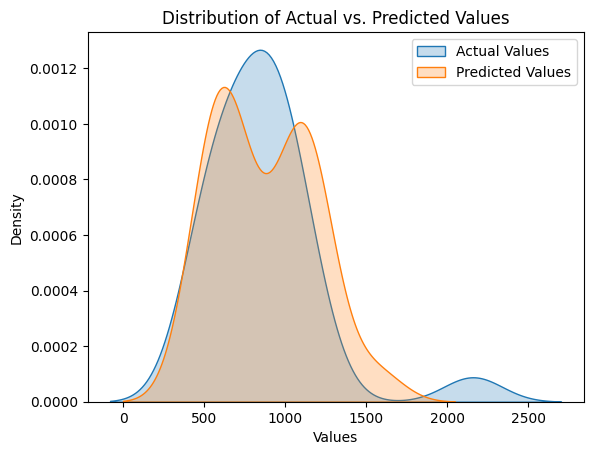

In [32]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()

# Embedded Method (Best 122,0.87)

In [33]:
from sklearn.linear_model import Lasso

# L1 Regularization (LASSO)
alpha = 0.008  # Adjust regularization strength as needed
# alpha = 0.008 RMSE=122
# alpha = 0.01  # RMSE 123
lasso = Lasso(alpha=alpha)
lasso.fit(X, y)
coef = lasso.coef_

# Features with non-zero coefficients are selected
selected_features_lasso = X.columns[coef != 0]

print("\nLASSO-Selected Features:")
print(selected_features_lasso)


LASSO-Selected Features:
Index(['f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f3', 'f4', 'f5', 'f7', 'f8',
       'f10', 'f12', 'f13', 'f14', 'f19', 'f20', 'f25', 'f27', 'f30', 'f32',
       'f34', 'f31', 'f33', 'f2'],
      dtype='object')


In [34]:
data_feature=pd.DataFrame()
for i in selected_features_lasso:
  data_feature[i]=X[i]
data_feature.head(3)

,f35,f36,f37,f38,f39,f40,f3,f4,f5,f7,...,f19,f20,f25,f27,f30,f32,f34,f31,f33,f2
0,0.00,0.00,0.00,0.06,0.06,0.07,-0.00,0.08,0.00,0.00,...,0.00,-0.00,0.70,-0.70,-0.00,-0.00,0.04,0.00,-0.00,0.00
1,0.01,0.01,0.00,0.40,0.42,0.46,-0.00,0.52,-0.00,0.01,...,0.00,-0.01,0.01,0.01,-0.00,-0.00,0.42,0.00,-0.00,0.00
2,0.00,0.00,0.00,0.25,0.26,0.29,-0.00,0.33,-0.00,0.02,...,0.00,-0.01,-0.54,0.55,-0.00,-0.00,0.27,0.00,-0.00,0.00


In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_feature,y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 16.72it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 25
[LightGBM] [Info] Start training from score 787.585859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [36]:
models=models.sort_values(by='RMSE')
models.head(7)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,4.17,0.87,122.85,0.21
AdaBoostRegressor,5.59,0.81,147.79,0.13
GradientBoostingRegressor,8.64,0.68,190.75,0.16
RandomForestRegressor,8.97,0.67,194.84,0.26
PoissonRegressor,9.92,0.63,206.14,0.04
BaggingRegressor,12.16,0.54,230.53,0.05
TransformedTargetRegressor,12.36,0.53,232.66,0.02


In [37]:
name='XGBRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
print( ' for Model :', name)
# df1.head(10)
df1=df1.sort_values(by='Deviation')
df1

 for Model : XGBRegressor


,Orignal,XGBRegressor,Deviation,Battery No.
21,483.00,484.47,1.47,51
17,559.00,565.90,6.90,17
4,480.00,487.25,7.25,46
14,520.00,508.21,11.79,69
10,788.00,773.88,14.12,15
8,825.00,848.22,23.22,106
19,461.00,489.71,28.71,61
6,616.00,571.73,44.27,39
11,1054.00,992.98,61.02,8
1,989.00,924.20,64.80,107


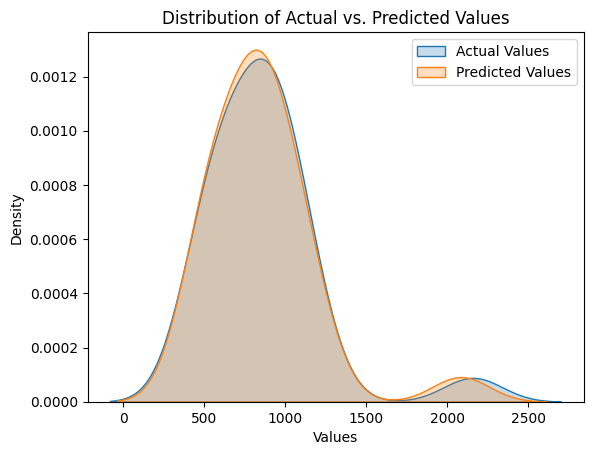

In [38]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()


# Wrapper Selection Method


In [39]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming you have your own X and y data
# X and y should be your feature matrix and target variable, respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base model
model = RandomForestRegressor()

# Create the RFE model and select a certain number of features
num_features_to_select =   12
rfe = RFE(model, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_rfe)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")


R-squared: 0.49552451200726566
RMSE: 310.0375475777087


In [40]:
data_feature=pd.DataFrame()
for i in selected_features_lasso:
  data_feature[i]=X[i]
data_feature.head(3)

,f35,f36,f37,f38,f39,f40,f3,f4,f5,f7,...,f19,f20,f25,f27,f30,f32,f34,f31,f33,f2
0,0.00,0.00,0.00,0.06,0.06,0.07,-0.00,0.08,0.00,0.00,...,0.00,-0.00,0.70,-0.70,-0.00,-0.00,0.04,0.00,-0.00,0.00
1,0.01,0.01,0.00,0.40,0.42,0.46,-0.00,0.52,-0.00,0.01,...,0.00,-0.01,0.01,0.01,-0.00,-0.00,0.42,0.00,-0.00,0.00
2,0.00,0.00,0.00,0.25,0.26,0.29,-0.00,0.33,-0.00,0.02,...,0.00,-0.01,-0.54,0.55,-0.00,-0.00,0.27,0.00,-0.00,0.00


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_feature,y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:03<00:00, 13.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 25
[LightGBM] [Info] Start training from score 787.585859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [42]:
models=models.sort_values(by='RMSE')
models.head(7)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,4.17,0.87,122.85,0.17
AdaBoostRegressor,5.59,0.81,147.79,0.20
GradientBoostingRegressor,8.64,0.68,190.75,0.24
RandomForestRegressor,8.97,0.67,194.84,0.23
PoissonRegressor,9.92,0.63,206.14,0.04
BaggingRegressor,12.16,0.54,230.53,0.07
TransformedTargetRegressor,12.36,0.53,232.66,0.02


In [43]:
name='XGBRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
print( ' for Model :', name)
# df1.head(10)
df1=df1.sort_values(by='Deviation')
df1

 for Model : XGBRegressor


,Orignal,XGBRegressor,Deviation,Battery No.
21,483.00,484.47,1.47,51
17,559.00,565.90,6.90,17
4,480.00,487.25,7.25,46
14,520.00,508.21,11.79,69
10,788.00,773.88,14.12,15
8,825.00,848.22,23.22,106
19,461.00,489.71,28.71,61
6,616.00,571.73,44.27,39
11,1054.00,992.98,61.02,8
1,989.00,924.20,64.80,107


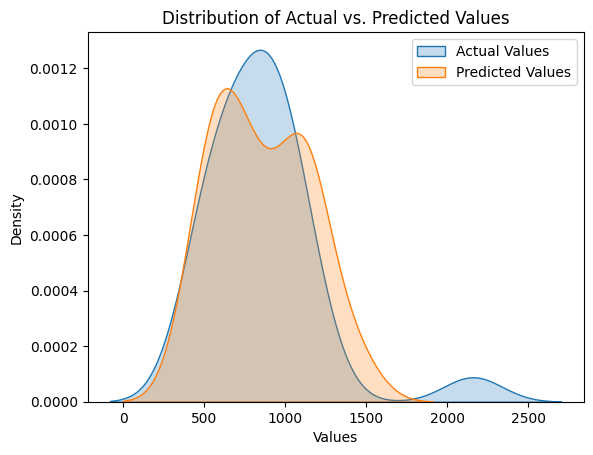

In [44]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(y_pred, label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()


# SelectKBest

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X is your feature matrix and y is your target vector
# Select the top k features based on the f_classif score
k_best = SelectKBest(score_func=f_classif, k=25)  # Adjust the number of features you want
X_new = k_best.fit_transform(X, y)

print("\nSelectKBest-Selected Features:")
print(X.columns[k_best.get_support()])


SelectKBest-Selected Features:
Index(['f28', 'f29', 'f38', 'f39', 'f40', 'f42', 'f3', 'f4', 'f5', 'f7', 'f8',
       'f14', 'f16', 'f17', 'f18', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26',
       'f27', 'f33', 'f2', 'f1'],
      dtype='object')


In [46]:
data_feature=pd.DataFrame()
for i in X.columns[k_best.get_support()]:
  data_feature[i]=X[i]
data_feature.head(3)

,f28,f29,f38,f39,f40,f42,f3,f4,f5,f7,...,f21,f22,f23,f24,f25,f26,f27,f33,f2,f1
0,0.00,0.00,0.06,0.06,0.07,0.00,-0.00,0.08,0.00,0.00,...,-0.00,0.00,-0.00,0.00,0.70,0.00,-0.70,-0.00,0.00,0.00
1,0.01,0.00,0.40,0.42,0.46,0.00,-0.00,0.52,-0.00,0.01,...,-0.00,0.01,-0.00,0.01,0.01,0.01,0.01,-0.00,0.00,0.00
2,0.01,0.00,0.25,0.26,0.29,0.00,-0.00,0.33,-0.00,0.02,...,-0.00,0.01,-0.00,0.01,-0.54,0.01,0.55,-0.00,0.00,0.00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_feature,y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 74%|███████▍  | 31/42 [00:01<00:00, 17.00it/s]

In [ ]:
models=models.sort_values(by='RMSE')
models.head(7)

In [ ]:
name='AdaBoostRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
print( ' for Model :', name)
df1.head(10)
# df1

In [ ]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()


# PCA

In [ ]:
from sklearn.decomposition import PCA

# Assuming you have your dataset in X, where rows are samples and columns are features

# Step 1: Standardize the Data


# Step 2: Calculate the Covariance Matrix
covariance_matrix = np.cov(X, rowvar=False)

# Step 3: Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort Eigenvalues and Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select Principal Components
n_components = 12  # Choose the number of components you want to retain
selected_eigenvectors = eigenvectors[:, :n_components]

# Step 6: Projection onto New Feature Space
X_pca = np.dot(X, selected_eigenvectors)
F_pca=pd.DataFrame(X_pca)
F_pca.head()
# Step 7: Use X_pca for modeling
# You can now use X_pca for machine learning modeling, e.g., classification or regression.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(F_pca,y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
predictions

In [ ]:
models=models.sort_values(by='RMSE')
models.head(7)

In [ ]:
name='ExtraTreesRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
df1['percentage']=(df1['Deviation']/df1['Orignal'])*100
print( ' for Model :', name)
print('Avg:', df1['percentage'].mean())

df1.head(10)
# df1

In [ ]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()


# W- Random forest



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score

# Assume X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty set of selected features
selected_features = set()

# Define a stopping criterion (e.g., a maximum number of features)
max_features = 12

while len(selected_features) < max_features:
    # Features not yet selected
    remaining_features = list(set(X.columns) - selected_features)

    best_feature = None
    best_score = 10000

    for feature in remaining_features:
        # Create a new subset of features
        current_features = list(selected_features) + [feature]

        # Train a model
        # model = ExtraTreesRegressor()
        # model =DecisionTreeRegressor(max_depth=3)
        model = RandomForestClassifier()
        # model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train[current_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[current_features])

        # Evaluate performance
        score = np.sqrt(mean_squared_error(y_test, y_pred))

        # Update if the score is better
        if score < best_score:
            best_score = score
            best_feature = feature

    # Add the best feature to the selected set
    selected_features.add(best_feature)
    print(f"Selected Feature: {best_feature}, Score: {best_score}")

# Use the final selected features for further analysis
print("Final Selected Features:", selected_features)


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import itertools

# # Load your data here and split it into features (X) and target (y)
# # X, y = load_data()

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# best_model = None
# best_rmse = float('inf')
# best_r2 = -float('inf')

# # Define hyperparameters to search over
# n_trees_range = range(1, 100,10)
# # max_splits_range = [2]
# # min_leaf_size_range = [5]

# max_splits_range = range(2, 10,2)
# min_leaf_size_range = range(5, 26,2)

# # Iterate over all combinations of hyperparameters for Random Forest
# for n_trees, max_splits, min_leaf_size in itertools.product(n_trees_range, max_splits_range, min_leaf_size_range):
#     model = RandomForestRegressor(n_estimators=n_trees, max_depth=max_splits, min_samples_leaf=min_leaf_size, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)

#     if rmse < best_rmse:
#         best_model = model
#         best_rmse = rmse
#         best_r2 = r2

#     print(f"Number of Trees: {n_trees}, Max Splits: {max_splits}, Min Leaf Size: {min_leaf_size}")
#     print(f"RMSE: {rmse:.4f}, R^2: {r2:.4f}")
#     print("----------------------------------------------------------")

# print("Best Random Forest Model:")
# print(f"Number of Trees: {best_model.n_estimators}, Max Splits: {best_model.max_depth}, Min Leaf Size: {best_model.min_samples_leaf}")
# print(f"Best RMSE: {best_rmse:.4f}, Best R^2: {best_r2:.4f}")
# print("----------------------------------------------------------")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features],y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
models=models.sort_values(by='RMSE')
models.head(7)

In [ ]:
name='RandomForestRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
df1['percentage']=(df1['Deviation']/df1['Orignal'])*100
print( ' for Model :', name)
print('Avg:', df1['percentage'].mean())

df1.head(15)
# df1

In [ ]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()


# W -GBR

```
`# This is formatted as code`
```



    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score

# Assume X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty set of selected features
selected_features = set()

# Define a stopping criterion (e.g., a maximum number of features)
max_features = 12

while len(selected_features) < max_features:
    # Features not yet selected
    remaining_features = list(set(X.columns) - selected_features)

    best_feature = None
    best_score = 10000

    for feature in remaining_features:
        # Create a new subset of features
        current_features = list(selected_features) + [feature]

        # Train a model
        # model = ExtraTreesRegressor()
        model =GradientBoostingRegressor(max_depth=3)
        # model = RandomForestClassifier()
        # model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train[current_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[current_features])

        # Evaluate performance
        score = np.sqrt(mean_squared_error(y_test, y_pred))

        # Update if the score is better
        if score < best_score:
            best_score = score
            best_feature = feature

    # Add the best feature to the selected set
    selected_features.add(best_feature)
    print(f"Selected Feature: {best_feature}, Score: {best_score}")

# Use the final selected features for further analysis
print("Final Selected Features:", selected_features)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features],y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
models=models.sort_values(by='RMSE')
models.head(7)

In [ ]:
name='RandomForestRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
df1['percentage']=(df1['Deviation']/df1['Orignal'])*100
print( ' for Model :', name)
print('Avg:', df1['percentage'].mean())

df1.head(15)
# df1

In [ ]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()


# W -GBR

```
`# This is formatted as code`
```



    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
# Assume X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty set of selected features
selected_features = set()

# Define a stopping criterion (e.g., a maximum number of features)
max_features = 12

while len(selected_features) < max_features:
    # Features not yet selected
    remaining_features = list(set(X.columns) - selected_features)

    best_feature = None
    best_score = 10000

    for feature in remaining_features:
        # Create a new subset of features
        current_features = list(selected_features) + [feature]

        # Train a model
        # model = ExtraTreesRegressor()
        model = MLPRegressor(hidden_layer_sizes=(4,) * 4, max_iter=300, batch_size=20, learning_rate_init=0.07, random_state=42)
        # model = RandomForestClassifier()
        # model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train[current_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[current_features])

        # Evaluate performance
        score = np.sqrt(mean_squared_error(y_test, y_pred))

        # Update if the score is better
        if score < best_score:
            best_score = score
            best_feature = feature

    # Add the best feature to the selected set
    selected_features.add(best_feature)
    print(f"Selected Feature: {best_feature}, Score: {best_score}")

# Use the final selected features for further analysis
print("Final Selected Features:", selected_features)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features],y,test_size=.2,random_state=12)
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
models=models.sort_values(by='RMSE')
models.head(7)

In [ ]:
name='RandomForestRegressor'    # put name which you want to see here
# to check Observed Vs predicted
df1=pd.DataFrame()
df1['Orignal']=y_test
a=df1.index
df1.reset_index(drop=True, inplace=True)
df1[name]=predictions[name]
df1['Deviation']=abs(df1['Orignal']-df1[name])
df1['Battery No.']=a
df1['percentage']=(df1['Deviation']/df1['Orignal'])*100
print( ' for Model :', name)
print('Avg:', df1['percentage'].mean())

df1.head(15)
# df1

In [ ]:
import seaborn as sns

sns.kdeplot(y_test, label="Actual Values", shade=True)
sns.kdeplot(predictions[name], label="Predicted Values", shade=True)
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs. Predicted Values")
plt.legend()
plt.show()
